#                                            ....... used_cars_in_egypt ........





# Project members :

## 1-Eslam mahmoud(Team Leader)
     ID:2206044
     {Data preprocessing}      
## 2-Omer Adel
     ID:2206010
     {Data visualization}
## 3-Emad Moustafa
     ID:2206008
     {data science techniques}
                                           


# Description of dataset :-

### The Dataset contains a lot of information about used cars in Egypt, and each car has its own specifications, its own price, and important information for the selling process.



# Data set Goals:-

#### 1- Effective pricing strategies can help people to efficiently sell their products in a competitive market and make a profit.
#### 2-Determine the price of used cars by taking into account a range of features, based on historical data.
#### 3-Get a better understanding of the most relevant features that help determine the price of a used vehicle.  


# Questions:-

#### 1-The most expensive types of used cars ?
#### 2-How many used cars do you have?
#### 3-Places that contain used cars?
#### 4-How many colors are used cars?
#### 5-Average used car prices?
#### 6-How many models are there?
#### 7-How many categories of cars?



# Action Plan:

### 1- Data preprocessing:
         .Data cleaning.
         .Data preparation.
### 2- Data visualization.
### 3- data science techniques:
         .Apriori algorithm
         .Decision Trees





























In [2]:
import numpy as np
import pandas as pd
import seaborn as sns  #visualization
import matplotlib.pyplot as plt  #visualization
from sklearn.preprocessing import PolynomialFeatures  # regression model
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
#read data
df=pd.read_csv(r'C:\Users\used_cars_in_egypt.csv')
df.head(8)

,Brand,Model,Color,Year,Fuel,Kilometers,Trasmission,Price,Gov
0,BMW,525,Black,2001.0,gas,"255,000 Km",automatic,"380,000 EGP",Heliopolis
1,Opel,Astra,Bronze,2015.0,gas,"130,000 Km",automatic,"480,000 EGP",Cairo
2,Chevrolet,Optra,Dark blue,2022.0,gas,"50,000 Km",automatic,"460,000 EGP",Cairo
3,Mitsubishi,Lancer Puma,Black,2009.0,gas,"165,000 Km",automatic,"295,000 EGP",Alexandria
4,Mercedes,E 320,Cyan,2004.0,gas,"300,000 Km",automatic,"580,000 EGP",Nasr city
5,Opel,Astra,Silver,2008.0,gas,"190,000 Km",automatic,"290,000 EGP",El Haram
6,Mitsubishi,Lancer EX Shark,Silver,2018.0,gas,"129,000 Km",automatic,"470,000 EGP",Cairo
7,Honda,City,Silver,2009.0,gas,"150,000 Km",automatic,"295,000 EGP",6 October


In [212]:
#Check numarcal data
df.describe()

,Year
count,17157.000000
mean,2011.278079
std,10.499088
min,1951.000000
25%,2007.000000
50%,2014.000000
75%,2019.000000
max,2023.000000


In [213]:
#  information dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17159 entries, 0 to 17158
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        17159 non-null  object 
 1   Model        17159 non-null  object 
 2   Color        17159 non-null  object 
 3   Year         17157 non-null  float64
 4   Fuel         17159 non-null  object 
 5   Kilometers   17159 non-null  object 
 6   Trasmission  17159 non-null  object 
 7   Price        17159 non-null  object 
 8   Gov          17159 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


## ● Data cleaning : 

In [9]:

df.drop('Fuel', axis=1, inplace=True)
df.head()

,Brand,Model,Color,Year,Kilometers,Trasmission,Price,Gov
0,BMW,525,Black,2001.0,255000,automatic,380000,Heliopolis
1,Opel,Astra,Bronze,2015.0,130000,automatic,480000,Cairo
2,Chevrolet,Optra,Dark blue,2022.0,50000,automatic,460000,Cairo
3,Mitsubishi,Lancer Puma,Black,2009.0,165000,automatic,295000,Alexandria
4,Mercedes,E 320,Cyan,2004.0,300000,automatic,580000,Nasr city


In [215]:
# Data type
df.dtypes

Brand           object
Model           object
Color           object
Year           float64
Kilometers      object
Trasmission     object
Price           object
Gov             object
dtype: object

In [216]:
# Checking null values
df.isna().sum()

Brand          0
Model          0
Color          0
Year           2
Kilometers     0
Trasmission    0
Price          0
Gov            0
dtype: int64

In [217]:
#missing vales
mask= df.isnull().any(axis=1)
clean_NaN_value= df[~mask]
df=clean_NaN_value
df


,Brand,Model,Color,Year,Kilometers,Trasmission,Price,Gov
0,BMW,525,Black,2001.0,"255,000 Km",automatic,"380,000 EGP",Heliopolis
1,Opel,Astra,Bronze,2015.0,"130,000 Km",automatic,"480,000 EGP",Cairo
2,Chevrolet,Optra,Dark blue,2022.0,"50,000 Km",automatic,"460,000 EGP",Cairo
3,Mitsubishi,Lancer Puma,Black,2009.0,"165,000 Km",automatic,"295,000 EGP",Alexandria
4,Mercedes,E 320,Cyan,2004.0,"300,000 Km",automatic,"580,000 EGP",Nasr city
...,...,...,...,...,...,...,...,...
17154,Renault,Sandero Step Way,Blue,2016.0,"125,000 Km",automatic,"395,000 EGP",Cairo
17155,Alfa Romeo,146,Red,1997.0,"110,000 Km",manual,"120,000 EGP",Helwan
17156,Skoda,Kodiaq,Gray,2019.0,"17,000 Km",automatic,"1,775,000 EGP",Shibin el Kom
17157,Opel,Corsa,Dark blue,1995.0,0 Km,automatic,"110,000 EGP",Cairo


In [218]:
# Checking null values
df.isna().sum()

Brand          0
Model          0
Color          0
Year           0
Kilometers     0
Trasmission    0
Price          0
Gov            0
dtype: int64

In [219]:
# Rename
df.columns=['Brand','model','Color','Year','Kilometers',' Trasmission','Price','Gov']
df.head()

,Brand,model,Color,Year,Kilometers,Trasmission,Price,Gov
0,BMW,525,Black,2001.0,"255,000 Km",automatic,"380,000 EGP",Heliopolis
1,Opel,Astra,Bronze,2015.0,"130,000 Km",automatic,"480,000 EGP",Cairo
2,Chevrolet,Optra,Dark blue,2022.0,"50,000 Km",automatic,"460,000 EGP",Cairo
3,Mitsubishi,Lancer Puma,Black,2009.0,"165,000 Km",automatic,"295,000 EGP",Alexandria
4,Mercedes,E 320,Cyan,2004.0,"300,000 Km",automatic,"580,000 EGP",Nasr city


# Data preparation:

In [4]:
# Data type
df.dtypes

Brand           object
Model           object
Color           object
Year           float64
Fuel            object
Kilometers      object
Trasmission     object
Price           object
Gov             object
dtype: object

In [5]:
df['Price']=df['Price'].str.replace(',','').str.replace('EGP','')
df['Price']=df['Price'].astype('int')
df['Kilometers']=df['Kilometers'].str.replace(',','').str.replace('Km','')
df['Kilometers']=df['Kilometers'].astype('int')

In [6]:
df.dtypes

Brand           object
Model           object
Color           object
Year           float64
Fuel            object
Kilometers       int32
Trasmission     object
Price            int32
Gov             object
dtype: object

In [7]:
#Check numarcal data
df.describe()

,Year,Kilometers,Price
count,17157.000000,1.715900e+04,1.715900e+04
mean,2011.278079,1.181300e+05,4.908604e+05
std,10.499088,9.127881e+04,7.648507e+06
min,1951.000000,0.000000e+00,0.000000e+00
25%,2007.000000,4.400000e+04,1.550000e+05
50%,2014.000000,1.080000e+05,3.150000e+05
75%,2019.000000,1.800000e+05,5.100000e+05
max,2023.000000,1.400000e+06,1.000000e+09


In [10]:
#Final data
df.head()

,Brand,Model,Color,Year,Kilometers,Trasmission,Price,Gov
0,BMW,525,Black,2001.0,255000,automatic,380000,Heliopolis
1,Opel,Astra,Bronze,2015.0,130000,automatic,480000,Cairo
2,Chevrolet,Optra,Dark blue,2022.0,50000,automatic,460000,Cairo
3,Mitsubishi,Lancer Puma,Black,2009.0,165000,automatic,295000,Alexandria
4,Mercedes,E 320,Cyan,2004.0,300000,automatic,580000,Nasr city


In [184]:
# split data
group= df.groupby('Brand')['Price'].max()
group

Brand
Alfa Romeo      1200000
Aston Martin    4500000
Audi            4750000
BMW             7900000
Baic            1400000
                 ...   
Toyota          5750000
Victory          220000
Volkswagen      2150000
Volvo           5000000
Zotye            750000
Name: Price, Length: 94, dtype: int32

In [185]:
df.Brand.value_counts()

Hyundai               1802
Chevrolet             1296
Fiat                  1134
Nissan                1131
Kia                   1090
                      ... 
Canghe  || Changhe       1
Pontiac                  1
Aston Martin             1
Kaiyi                    1
Perodua                  1
Name: Brand, Length: 94, dtype: int64

In [117]:
group5= df.groupby('Brand')['Price'].mean()
group5

Brand
Alfa Romeo      3.501539e+05
Aston Martin    4.500000e+06
Audi            1.394014e+06
BMW             9.821681e+05
Baic            5.231034e+05
                    ...     
Toyota          5.684011e+05
Victory         2.000000e+05
Volkswagen      3.974016e+05
Volvo           9.035116e+05
Zotye           3.611034e+05
Name: Price, Length: 94, dtype: float64

In [124]:
df.Gov.value_counts()

Cairo                         2427
Alexandria                    1361
6 October                     1006
Tagamo3 - New Cairo            895
Giza                           793
                              ... 
Safaga                           4
El-Alamein                       2
Marsa Alam                       2
New Administrative Capital       2
Edku                             1
Name: Gov, Length: 102, dtype: int64

In [118]:
df.Color.value_counts()

Silver        3357
Black         2945
White         2403
Red           1880
Gray           954
Blue           810
Light grey     747
Dark blue      713
Dark red       642
Gold           493
Green          340
Petroleum      323
Bronze         298
Cyan           268
Mocha          258
Brown          202
Dark green     127
Beige           98
Champagne       97
Eggplant        81
Orange          39
Olive           36
Yellow          24
Purple          22
Name: Color, dtype: int64

In [123]:
df.Model.value_counts()

Sunny          801
Corolla        489
Optra          423
F3             325
Cerato         302
              ... 
Marbella         1
Qin              1
Boxer            1
Thunderbird      1
607              1
Name: Model, Length: 828, dtype: int64

In [125]:
group2= df.groupby('Brand')['Year'].max()
group2

Brand
Alfa Romeo      2020.0
Aston Martin    2016.0
Audi            2023.0
BMW             2023.0
Baic            2023.0
                 ...  
Toyota          2023.0
Victory         2021.0
Volkswagen      2023.0
Volvo           2022.0
Zotye           2020.0
Name: Year, Length: 94, dtype: float64

In [126]:
df.Trasmission.value_counts()

automatic    11040
manual        6113
CVT              6
Name: Trasmission, dtype: int64

<AxesSubplot:>

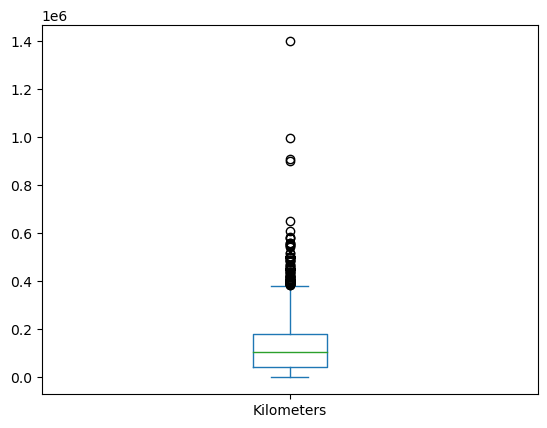

In [223]:
#Chake outliers 
df['Kilometers'].plot(kind='box')

In [224]:
df['Kilometers'].nlargest()

14738    1400000
13898     999000
4414      910000
13532     900000
13460     650000
Name: Kilometers, dtype: int32

In [131]:
#remove outliers
df.drop([14738,13898,4414,13460])

,Brand,Model,Color,Year,Fuel,Kilometers,Trasmission,Price,Gov
0,BMW,525,Black,2001.0,gas,"255,000 Km",automatic,"380,000 EGP",Heliopolis
1,Opel,Astra,Bronze,2015.0,gas,"130,000 Km",automatic,"480,000 EGP",Cairo
2,Chevrolet,Optra,Dark blue,2022.0,gas,"50,000 Km",automatic,"460,000 EGP",Cairo
3,Mitsubishi,Lancer Puma,Black,2009.0,gas,"165,000 Km",automatic,"295,000 EGP",Alexandria
4,Mercedes,E 320,Cyan,2004.0,gas,"300,000 Km",automatic,"580,000 EGP",Nasr city
...,...,...,...,...,...,...,...,...,...
17154,Renault,Sandero Step Way,Blue,2016.0,gas,"125,000 Km",automatic,"395,000 EGP",Cairo
17155,Alfa Romeo,146,Red,1997.0,gas,"110,000 Km",manual,"120,000 EGP",Helwan
17156,Skoda,Kodiaq,Gray,2019.0,gas,"17,000 Km",automatic,"1,775,000 EGP",Shibin el Kom
17157,Opel,Corsa,Dark blue,1995.0,gas,0 Km,automatic,"110,000 EGP",Cairo


<AxesSubplot:>

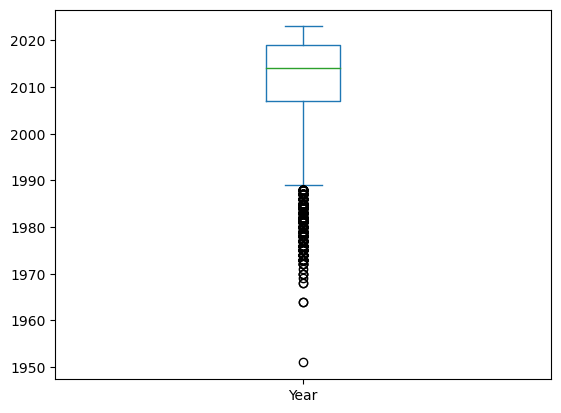

In [132]:
#Chake outliers 
df['Year'].plot(kind='box')

In [133]:
df['Year'].nlargest()

32     2023.0
50     2023.0
136    2023.0
253    2023.0
441    2023.0
Name: Year, dtype: float64

## ● Data visualization:

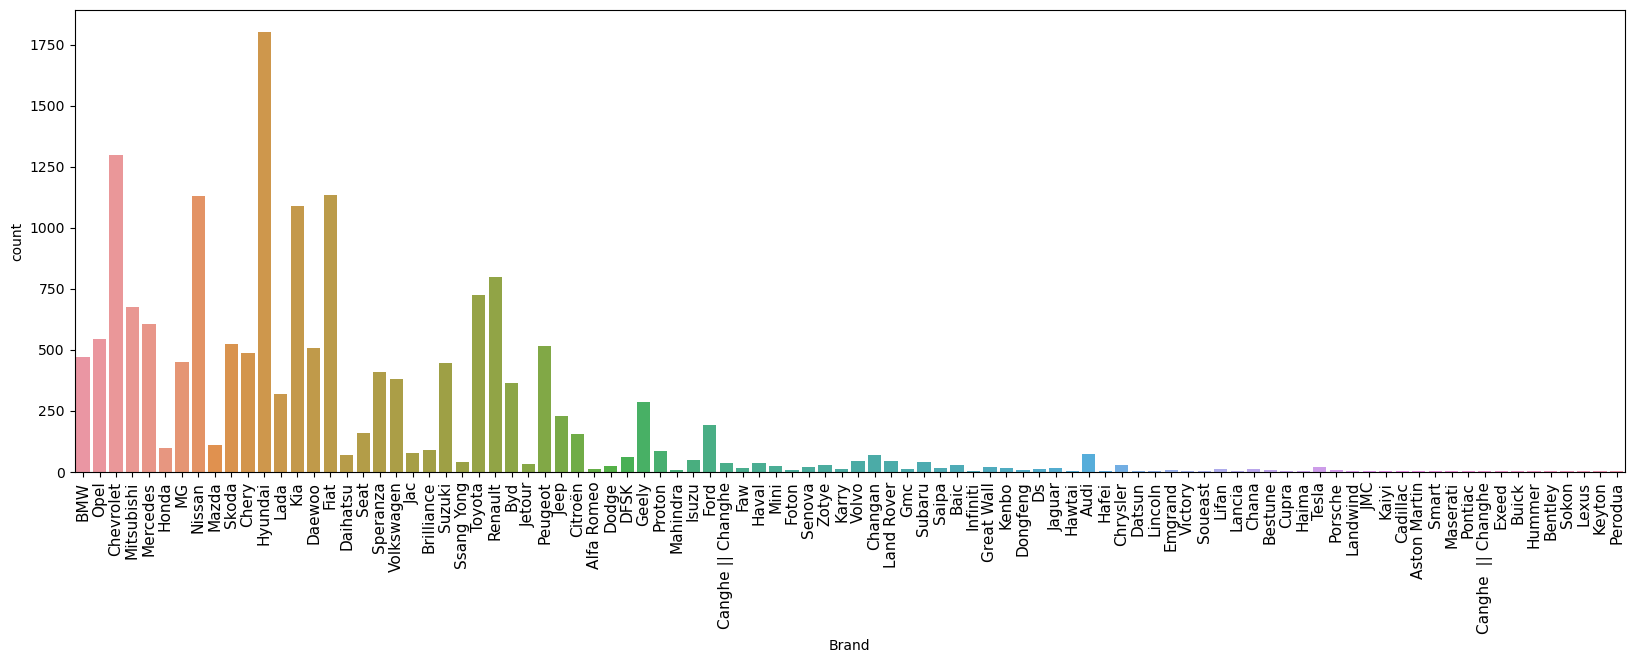

In [202]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=90,fontsize=11)
sns.countplot(data=df,x='Brand')
plt.show()


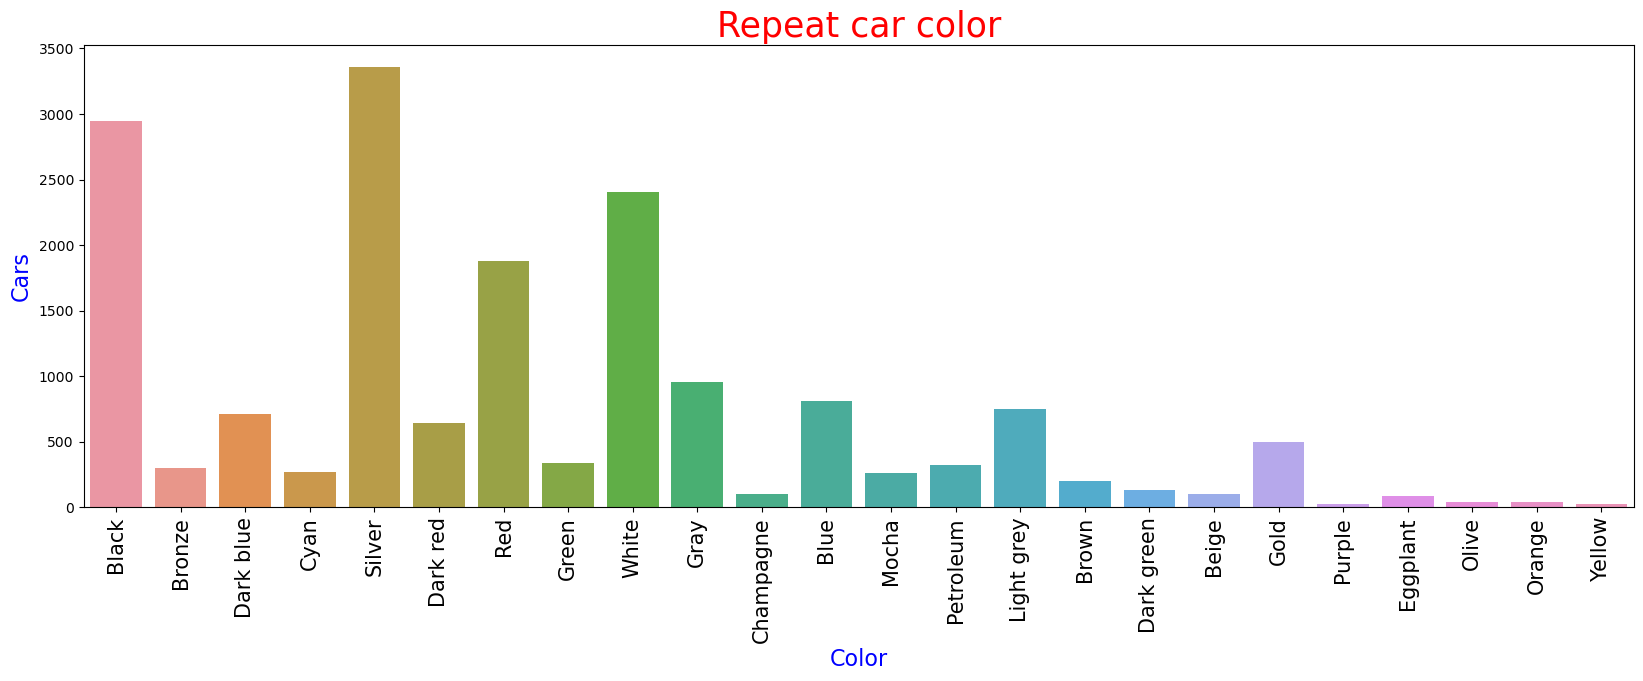

In [203]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=90,fontsize=15)
sns.countplot(data=df,x='Color')
plt.title('Repeat car color',fontsize=25,color='red')
plt.ylabel('Cars',fontsize=16,color='blue')
plt.xlabel('Color',fontsize=16,color='blue')
plt.show()


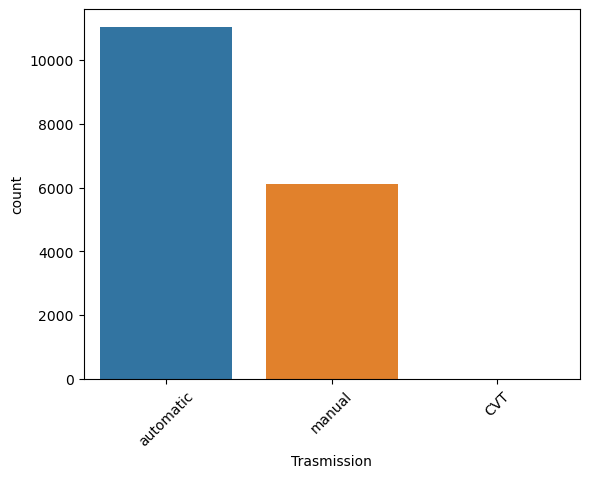

In [204]:
plt.xticks(rotation=45)
sns.countplot(data=df,x='Trasmission')
plt.show()

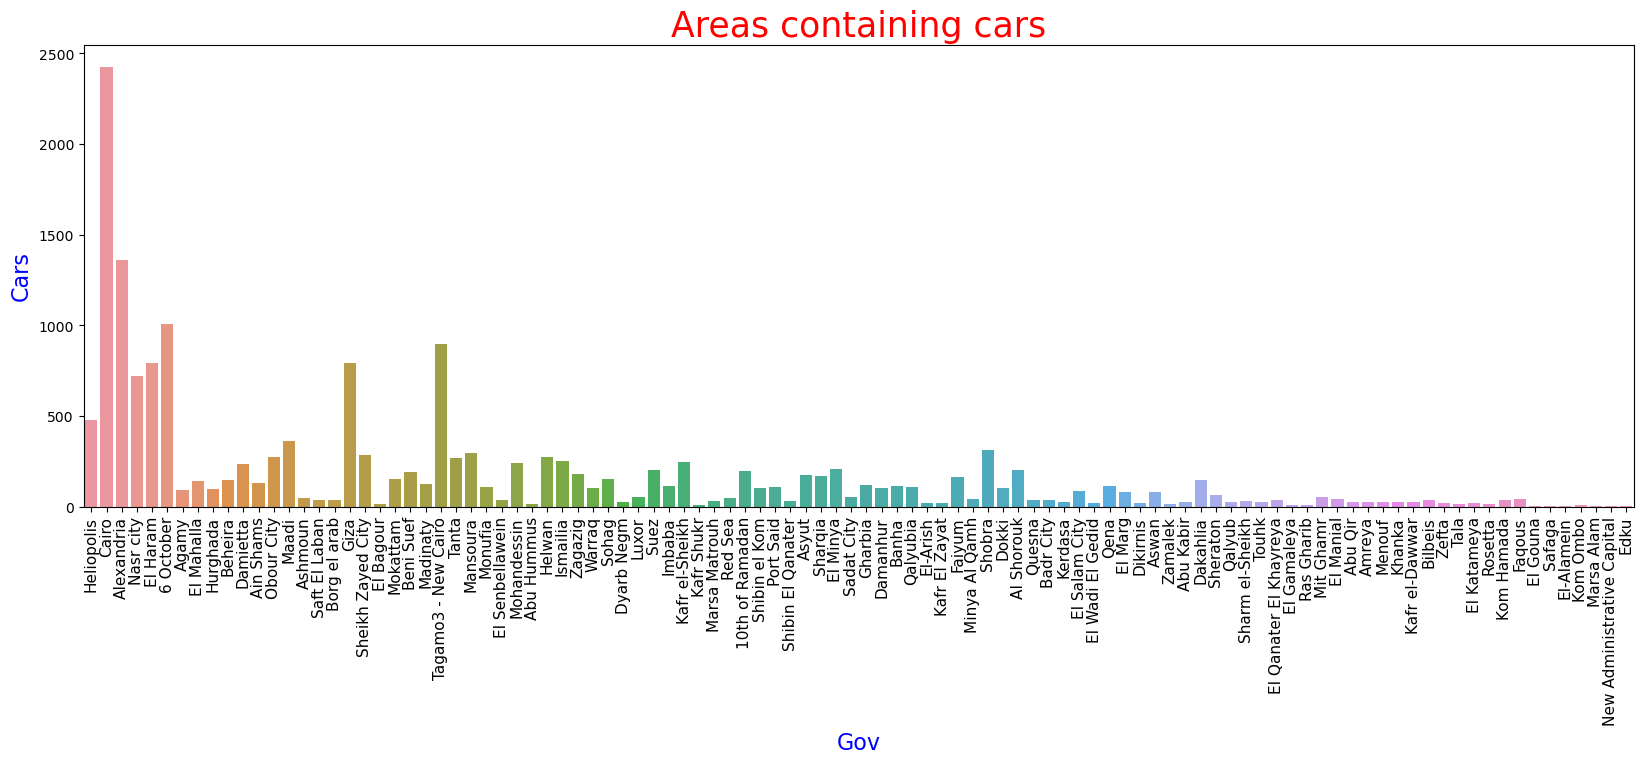

In [205]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=90,fontsize=11)
sns.countplot(data=df, x='Gov')
plt.title('Areas containing cars',fontsize=25,color='red')
plt.ylabel('Cars',fontsize=16,color='blue')
plt.xlabel('Gov',fontsize=16,color='blue')
plt.show()

C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):
C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


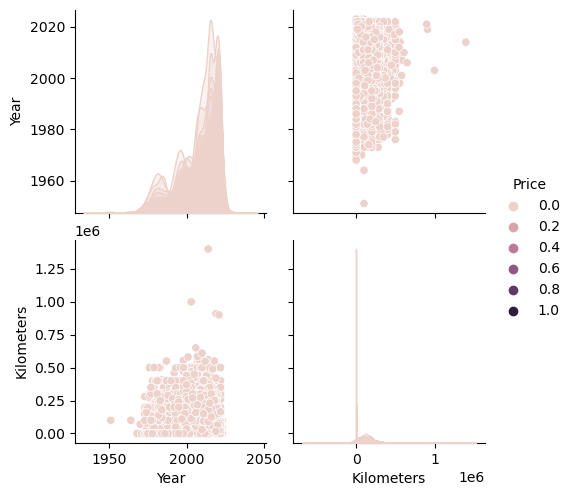

In [120]:
sns.pairplot(data=df,hue='Price');

C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):
C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


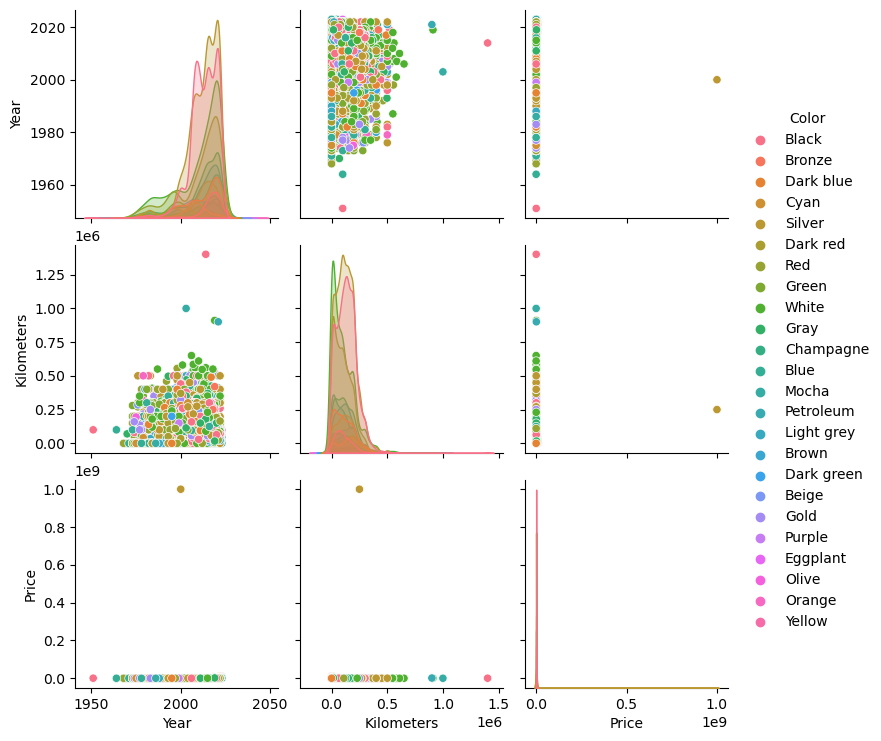

In [121]:
sns.pairplot(data=df,hue='Color');

# Apriori Algorithm

In [164]:
#1
data = list(df['Color'].apply(lambda x:x.split(",") ))
data

[['Black'],
 ['Bronze'],
 ['Dark blue'],
 ['Black'],
 ['Cyan'],
 ['Silver'],
 ['Silver'],
 ['Silver'],
 ['Silver'],
 ['Dark red'],
 ['Red'],
 ['Green'],
 ['White'],
 ['Gray'],
 ['White'],
 ['Black'],
 ['Dark blue'],
 ['Silver'],
 ['Champagne'],
 ['Silver'],
 ['Silver'],
 ['Black'],
 ['Black'],
 ['Black'],
 ['White'],
 ['White'],
 ['White'],
 ['Blue'],
 ['Black'],
 ['Red'],
 ['Black'],
 ['Mocha'],
 ['Petroleum'],
 ['Red'],
 ['Silver'],
 ['Light grey'],
 ['Blue'],
 ['Red'],
 ['Red'],
 ['Black'],
 ['Brown'],
 ['Cyan'],
 ['Brown'],
 ['Black'],
 ['Dark red'],
 ['Dark blue'],
 ['Silver'],
 ['Black'],
 ['Red'],
 ['Silver'],
 ['Mocha'],
 ['Mocha'],
 ['White'],
 ['Silver'],
 ['Red'],
 ['Black'],
 ['Black'],
 ['Gray'],
 ['White'],
 ['Silver'],
 ['White'],
 ['Black'],
 ['Dark green'],
 ['Gray'],
 ['White'],
 ['Red'],
 ['Beige'],
 ['Mocha'],
 ['Red'],
 ['Gold'],
 ['Black'],
 ['Gray'],
 ['Red'],
 ['Gray'],
 ['Gray'],
 ['Light grey'],
 ['Blue'],
 ['Black'],
 ['Black'],
 ['Red'],
 ['Black'],
 ['Black

In [165]:
a = TransactionEncoder()
a_data = a.fit(data).transform(data)
df = pd.DataFrame(a_data,columns=a.columns_)
df = df.replace(False,0)
df = df.replace(True,1)
df

,Beige,Black,Blue,Bronze,Brown,Champagne,Cyan,Dark blue,Dark green,Dark red,...,Light grey,Mocha,Olive,Orange,Petroleum,Purple,Red,Silver,White,Yellow
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17152,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
17154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17155,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
df = apriori(df, min_support = 0.001, use_colnames = True, verbose = 1)
df

Processing 552 combinations | Sampling itemset size 2


C:\Users\Ahmed\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.005712,(Beige)
1,0.171650,(Black)
2,0.047211,(Blue)
3,0.017369,(Bronze)
4,0.011774,(Brown)
5,0.005654,(Champagne)
6,0.015620,(Cyan)
7,0.041557,(Dark blue)
8,0.007402,(Dark green)
9,0.037419,(Dark red)


In [167]:
df_ar = association_rules(df, metric = "confidence", min_threshold = 0.0000001)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [190]:
#2
data2 = list(df['Model'].apply(lambda x:x.split(",") ))
data2


[['525'],
 ['Astra'],
 ['Optra'],
 ['Lancer Puma'],
 ['E 320'],
 ['Astra'],
 ['Lancer EX Shark'],
 ['City'],
 ['6'],
 ['Sunny'],
 ['5'],
 ['121'],
 ['Felicia'],
 ['6'],
 ['Tiggo 8'],
 ['Elantra'],
 ['323'],
 ['Tiggo 3'],
 ['Oka'],
 ['B 150'],
 ['Carens'],
 ['Nubira 2'],
 ['Cruze'],
 ['Punto'],
 ['Kancil'],
 ['133'],
 ['Creta'],
 ['5'],
 ['A516'],
 ['Spark'],
 ['6'],
 ['Elantra HD'],
 ['Sportage'],
 ['T-Series'],
 ['Elantra MD'],
 ['Qashqai'],
 ['Beetle'],
 ['Envy'],
 ['Qashqai'],
 ['Sunny'],
 ['Astra'],
 ['Picanto'],
 ['Sunny'],
 ['J7'],
 ['Jinbei'],
 ['Tipo'],
 ['IX 35'],
 ['Mokka'],
 ['Ibiza'],
 ['318'],
 ['Sunny'],
 ['Eclipse Cross'],
 ['128'],
 ['Swift Dzire || Dzire'],
 ['Tivoli'],
 ['ZS'],
 ['Corolla'],
 ['Lancer EX Shark'],
 ['Corolla'],
 ['5'],
 ['Lancer EX Shark'],
 ['Logan'],
 ['Punto'],
 ['Sunny'],
 ['Sportage'],
 ['F3'],
 ['Soul'],
 ['X70'],
 ['Juke'],
 ['230'],
 ['Aveo'],
 ['Tiggo 7 pro'],
 ['Alto'],
 ['Juke'],
 ['Lanos'],
 ['Carens'],
 ['Vitara'],
 ['301'],
 ['Verna'],
 [

In [191]:
a2 = TransactionEncoder()
a_data2 = a.fit(data2).transform(data2)
df = pd.DataFrame(a_data2,columns=a.columns_)
df = df.replace(False,0)
df = df.replace(True,1)
df

,100,104,11,1100,116,118,120,1200,121,124,...,Yukon XL,Z,Z100,Z4,ZS,ZX,foison || Foison,ideal || Ideal,ideal || Ideal,ssr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
df2 = apriori(df, min_support = 0.001, use_colnames = True, verbose = 1)
df2

C:\Users\Ahmed\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Processing 34782 combinations | Sampling itemset size 2


,support,itemsets
0,0.005129,(127)
1,0.013287,(128)
2,0.003963,(131)
3,0.002215,(132)
4,0.003438,(200)
...,...,...
182,0.001166,(X70)
183,0.001049,(XV)
184,0.001107,(Xceed)
185,0.002914,(Yaris)


In [193]:
df_ar2 = association_rules(df2, metric = "confidence", min_threshold = 0.000000001)
df_ar2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


# Decision Tree

In [197]:
Brand=LabelEncoder()
Kilometers=LabelEncoder()
Price=LabelEncoder()

In [198]:
encoded = pd.get_dummies(df[['Brand', 'Kilometers', 'Price']])
encoded.head(20)

,Brand_Alfa Romeo,Brand_Aston Martin,Brand_Audi,Brand_BMW,Brand_Baic,Brand_Bentley,Brand_Bestune,Brand_Brilliance,Brand_Buick,Brand_Byd,...,"Price_98,500 EGP","Price_980,000 EGP","Price_985,000 EGP","Price_99,000 EGP","Price_99,900 EGP","Price_990,000 EGP","Price_995,000 EGP","Price_997,000 EGP","Price_998,000 EGP","Price_999,000 EGP"
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [199]:
Totel = pd.concat([encoded, df['Gov']], axis=1)
Totel.head(20)

,Brand_Alfa Romeo,Brand_Aston Martin,Brand_Audi,Brand_BMW,Brand_Baic,Brand_Bentley,Brand_Bestune,Brand_Brilliance,Brand_Buick,Brand_Byd,...,"Price_980,000 EGP","Price_985,000 EGP","Price_99,000 EGP","Price_99,900 EGP","Price_990,000 EGP","Price_995,000 EGP","Price_997,000 EGP","Price_998,000 EGP","Price_999,000 EGP",Gov
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Heliopolis
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Cairo
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Cairo
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Alexandria
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Nasr city
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,El Haram
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Cairo
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6 October
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6 October
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Agamy


In [200]:
model = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0)
model.fit(encoded,Totel['Gov'])

DecisionTreeClassifier(max_depth=2, random_state=0)

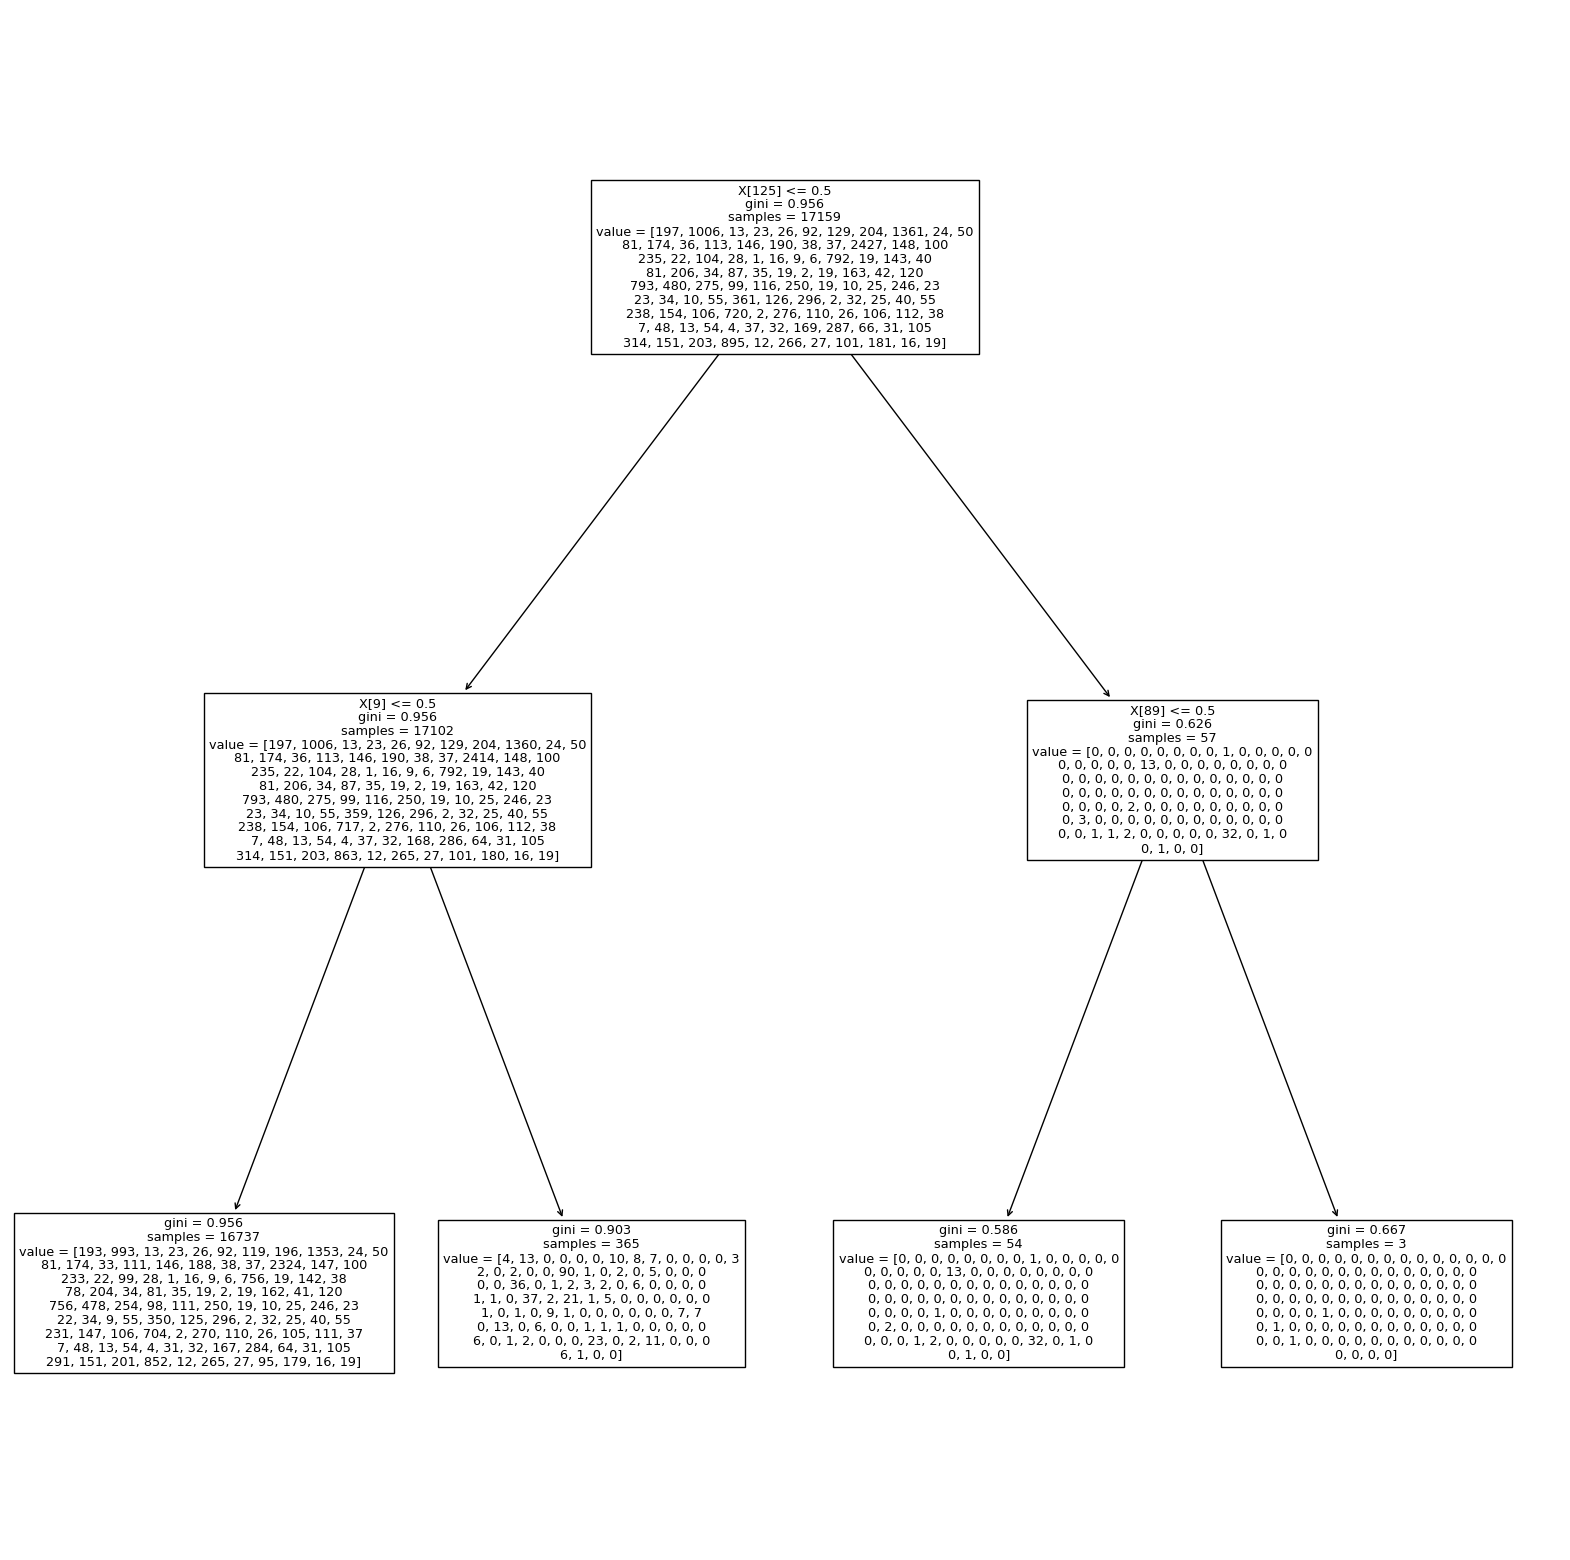

In [201]:
plt.figure(figsize=(20, 20))
plot_tree(model.fit(encoded,Totel['Gov']))
plt.show()

# Data insights:

### 1-data are more clearly than ever
### 2-we have knowledge about all the car models
### 3-we knew anything can affect the car price
### 4-car users will be more comfortable after having enough knowledge about their cars
### 5-people can buy cars easily